In [ ]:
# Install Pytrends package
! pip install pytrends

In [12]:
# Import the required packages
import pandas as pd
from pytrends.request import TrendReq

In [13]:
# Connect to Google Trends
bitcoin_trends = TrendReq(hl='en-US',tz=420)  #Timezone used here is for British Columbia

In [14]:
# Build payload for the required keywords
bitcoin_trends.build_payload(kw_list=['bitcoin'],timeframe='today 5-y') #Timeframe is between current day and last 5 years
result_df = bitcoin_trends.interest_over_time()

# Format the dataframe by removing index and formatting the date column in Y-M-D format
result_df['date'] = result_df.index
result_df.reset_index(drop=True,inplace=True)
result_df['date'] = pd.to_datetime(result_df['date']).dt.date
formatted_df = result_df[['date','bitcoin']]

In [15]:
formatted_df

,date,bitcoin
0,2017-09-17,15
1,2017-09-24,13
2,2017-10-01,12
3,2017-10-08,18
4,2017-10-15,20
...,...,...
255,2022-08-07,18
256,2022-08-14,17
257,2022-08-21,17
258,2022-08-28,17


In [16]:
# Save the results in a csv file
formatted_df.to_csv("Google_Trends_Bitcoin_Weekly_Data.csv",index=False)

Text(0, 0.5, 'Search Popularity')

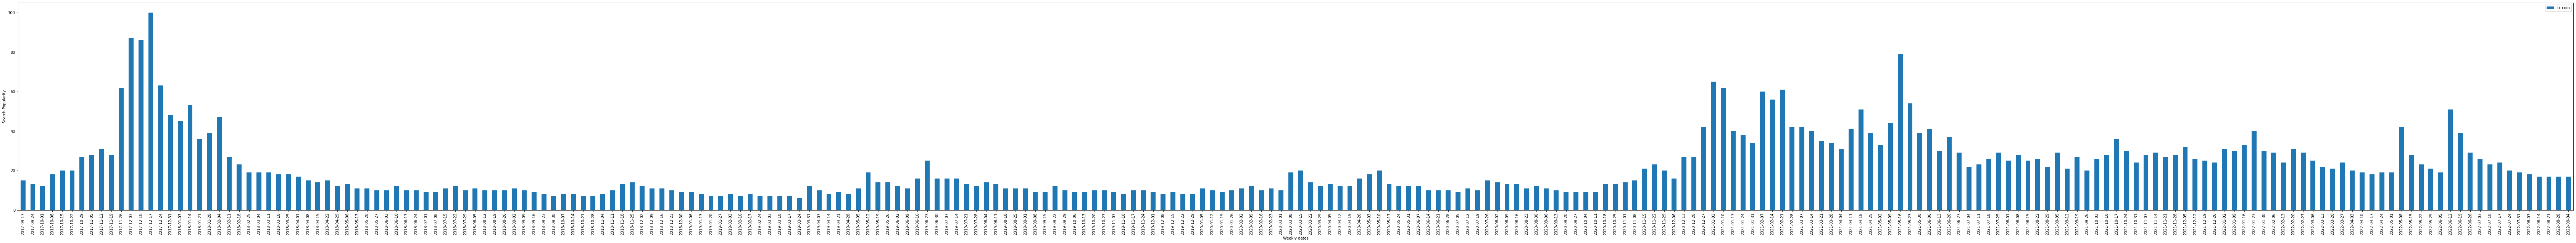

In [17]:
# Plot the Google trends weekly data for the keyword "bitcoin"
plot = formatted_df.plot(x='date',y='bitcoin',figsize=(120,10),kind='bar')
plot.set_xlabel("Weekly dates")
plot.set_ylabel("Search Popularity")